# Session 4

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import glob
edgecolors= ['k' ,'m' , 'y', 'b', 'r', 'g' , 'c']
lumi = 1298.1

# Import the helper functions library:
import helpers as hp

## 1.Ouverture data

In [173]:
data4_file = "Rapport/data_4.csv"
data4 = pd.read_csv(data4_file)
data4

,Unnamed: 0,photon1_pT,photon2_pT,photon1_phi,photon2_phi,photon1_eta,photon2_eta,dEta,n_jets,average_jet_pT,lead_jets_dPhi,n_leptons,photon1_isolation,photon2_isolation,missing_energy
0,0,239.816919,224.827245,0.374516,0.217238,0.097796,0.283722,0.185927,1.0,281.076262,2.020853,3.0,0.452956,0.634915,0.010154
1,1,204.079007,368.664839,0.514495,1.124155,1.703798,0.193999,1.509799,2.0,106.082548,0.619393,3.0,0.580863,0.873057,0.016922
2,2,182.055242,208.448192,1.355083,2.061468,-3.707784,-0.024478,3.683306,7.0,125.536703,5.921789,2.0,0.950136,0.677193,0.084939
3,3,260.305067,338.470317,5.419384,5.334616,-0.494060,0.481979,0.976039,4.0,112.151764,12.049545,2.0,0.264094,0.669787,0.023700
4,4,192.288182,255.126181,3.522988,3.068359,0.018212,0.236752,0.218541,3.0,97.454051,1.020136,2.0,0.886477,0.785280,0.080083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134921,134921,332.909700,273.338664,1.331610,2.776155,1.712625,-0.320940,2.033564,4.0,707.668413,4.089887,4.0,1.138114,0.191078,0.010498
134922,134922,184.048014,272.396892,1.470582,2.148570,3.254946,0.912729,2.342217,2.0,114.627139,-1.376600,1.0,0.412357,0.413361,0.087782
134923,134923,260.188483,272.099398,0.726095,3.254745,0.008460,-1.140652,1.149112,1.0,109.523759,2.439066,2.0,0.869008,0.837076,0.128985
134924,134924,431.563125,256.756795,4.527772,4.390772,0.910087,0.541989,0.368098,3.0,98.918085,6.816687,1.0,0.731553,0.652829,0.058726


In [174]:
observables = ["photon1_pT", 
               "photon2_pT", 
               "photon1_phi", 
               "photon2_phi", 
               "photon1_eta", 
               "photon2_eta", 
               "dEta", 
               "n_jets", 
               "average_jet_pT", 
               "lead_jets_dPhi", 
               "n_leptons", 
               "photon1_isolation", 
               "photon2_isolation", 
               "missing_energy"]

binning = np.linspace(100, 3100, num=50) # for m_yy

plotdir="."


In [175]:
binning.shape

(50,)

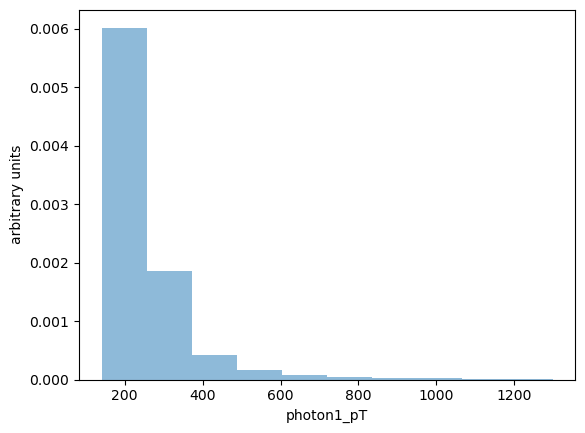

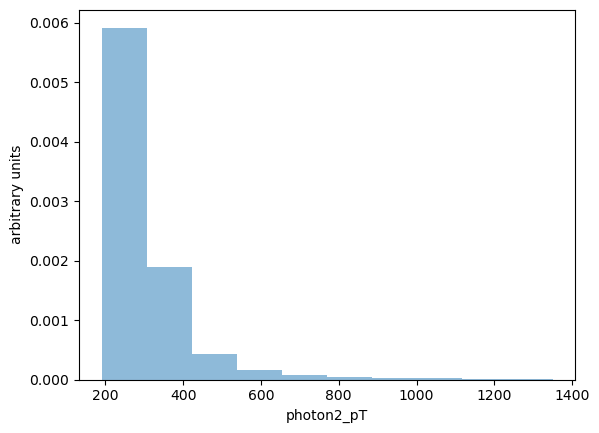

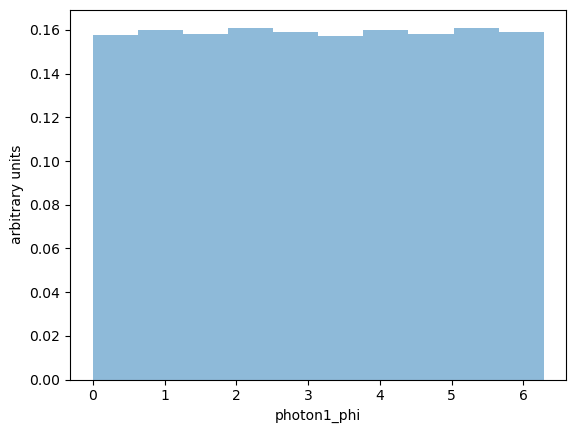

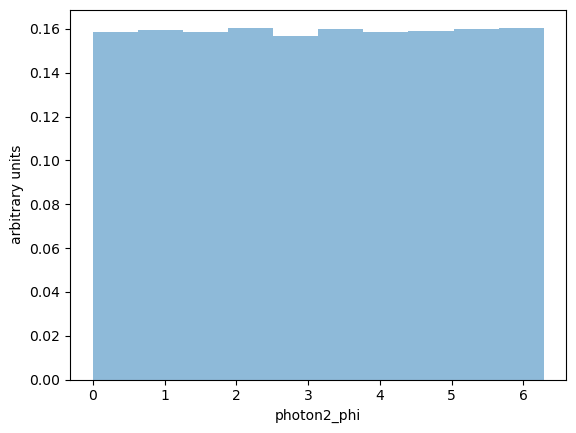

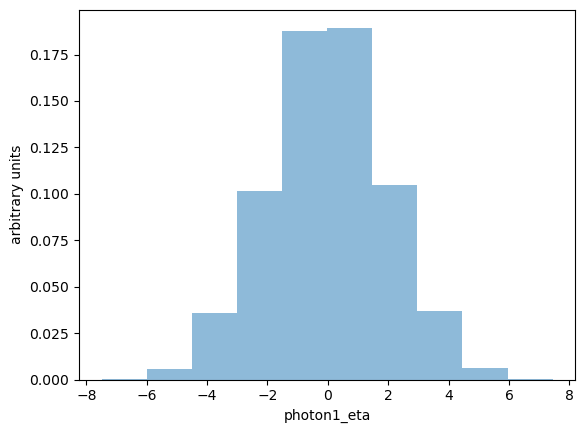

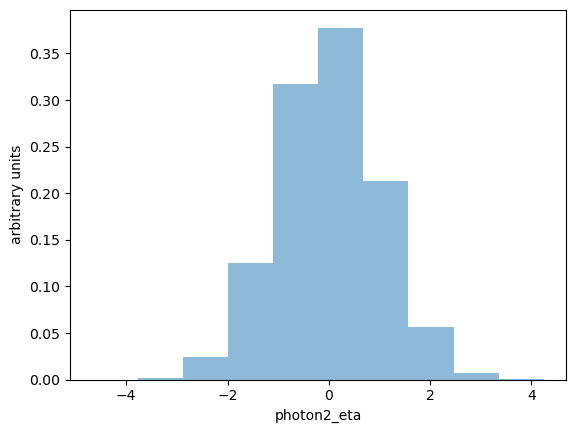

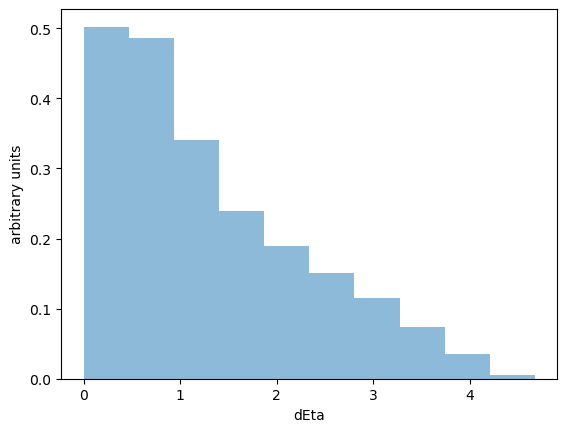

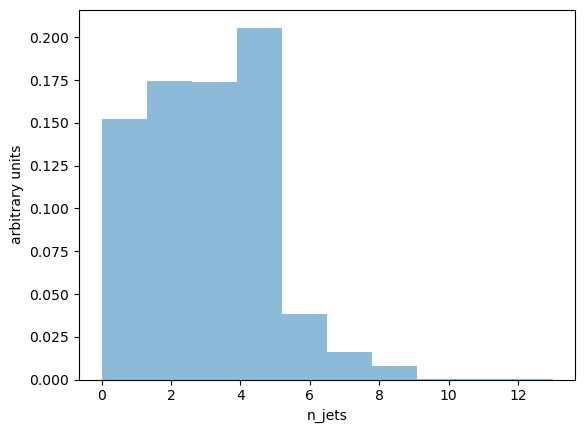

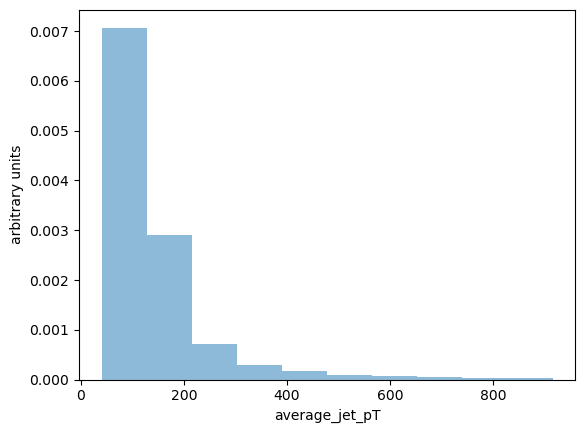

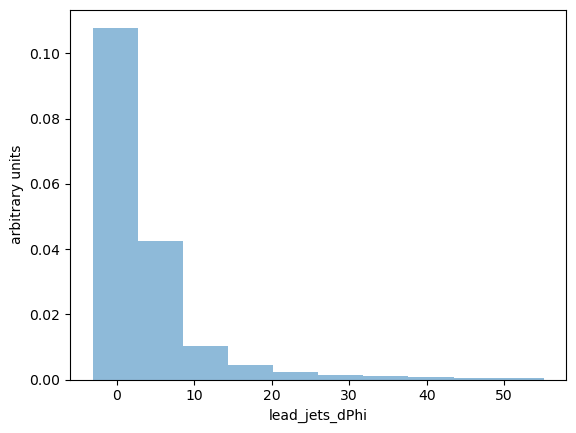

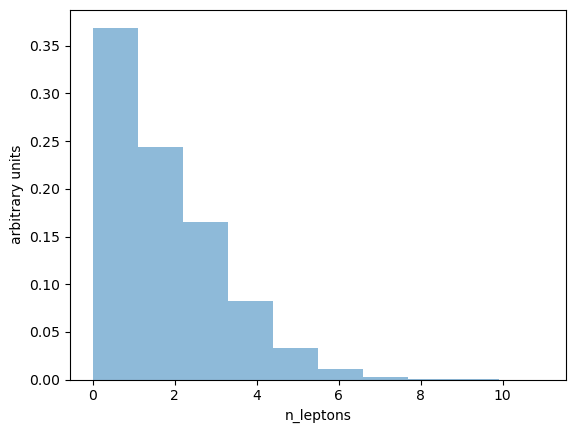

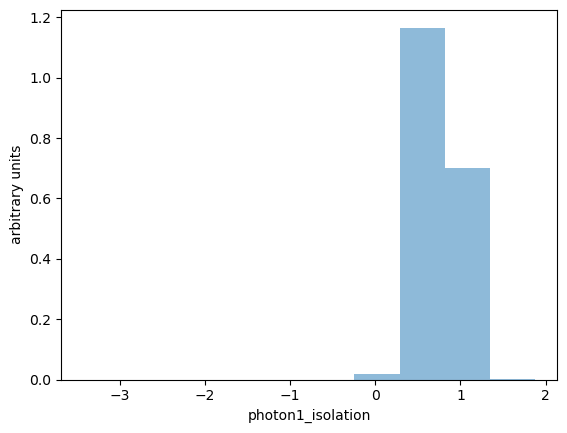

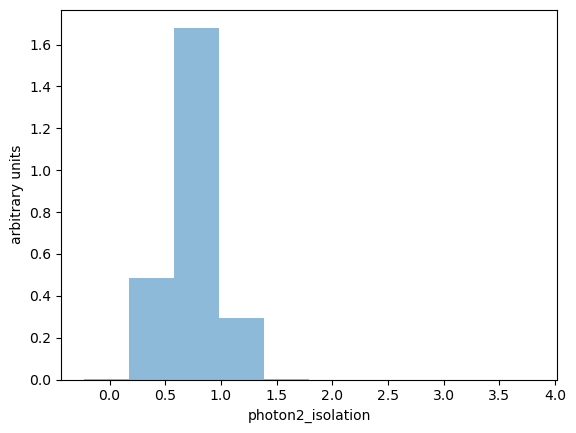

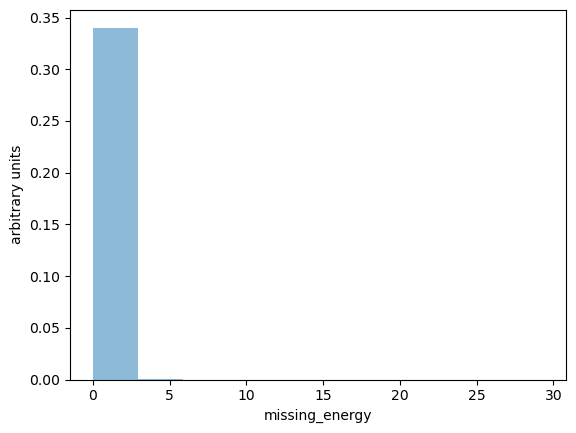

<Figure size 640x480 with 0 Axes>

In [176]:
for obs in observables:
    data = np.array(data4[obs])
    plt.hist(data, alpha=0.5, density=1)
    plt.ylabel("arbitrary units")
    plt.xlabel(obs)
    plt.show()
    plt.clf()



## 1.1 avec bg

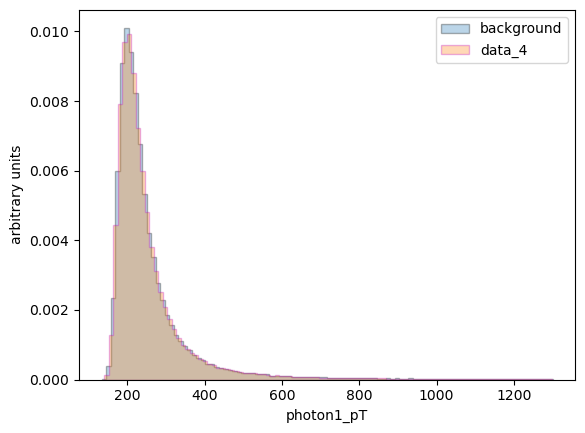

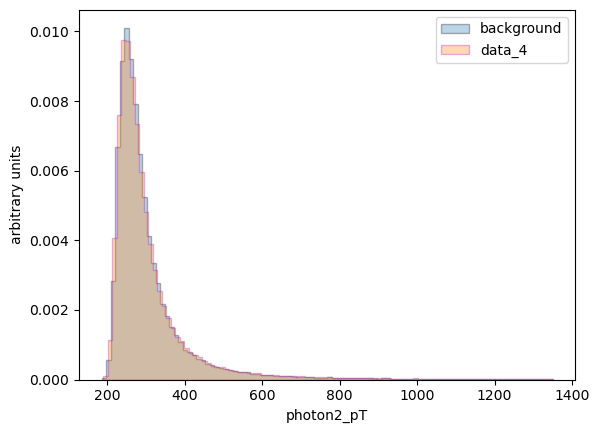

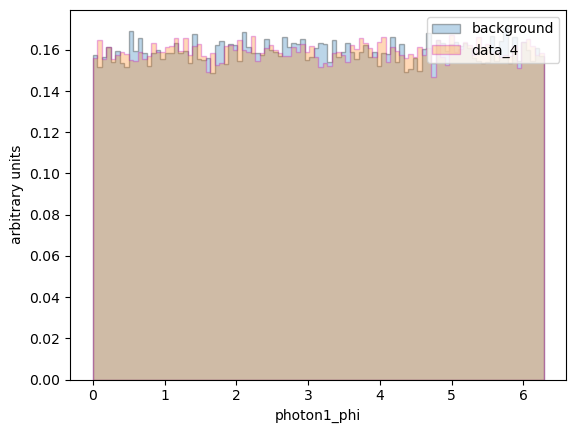

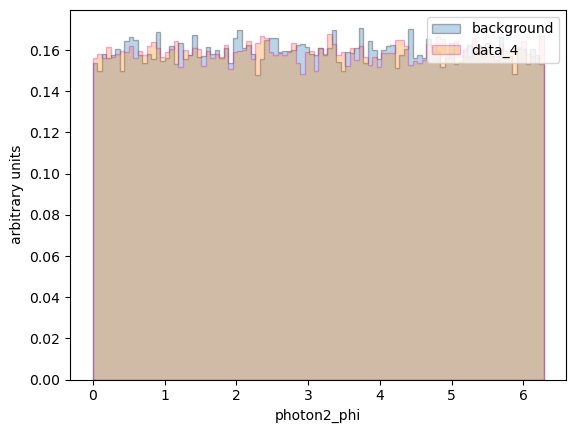

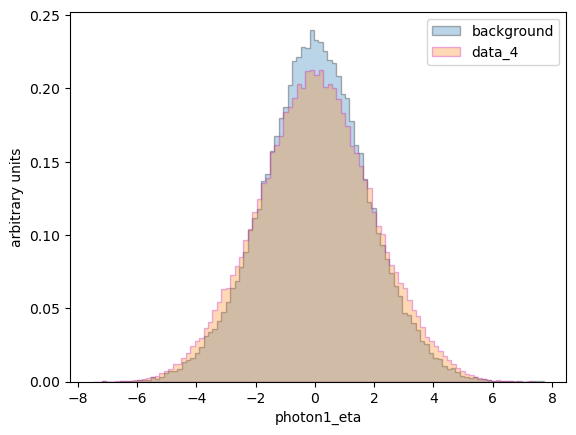

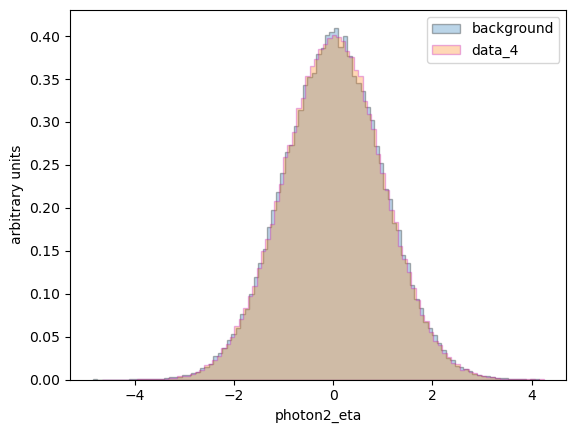

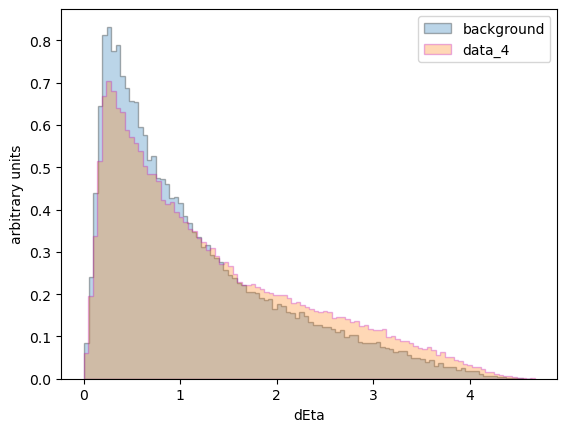

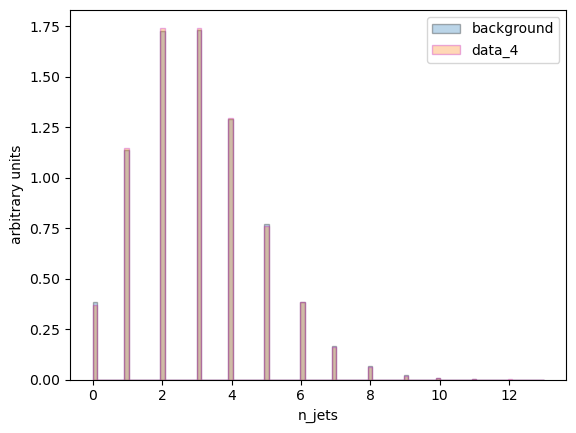

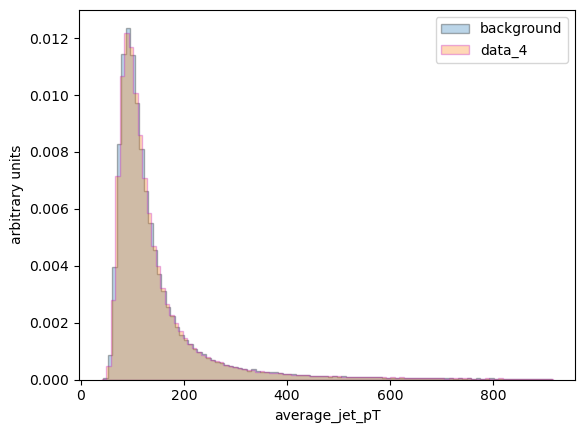

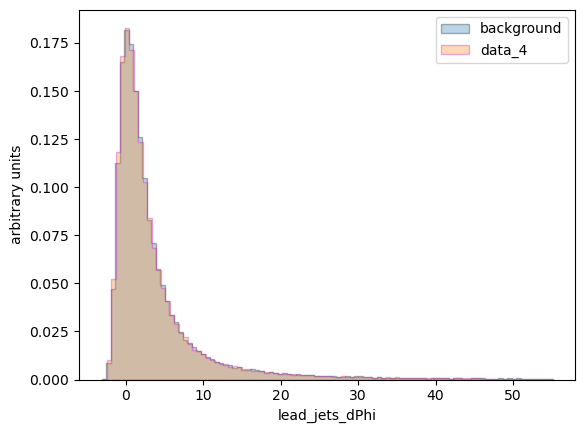

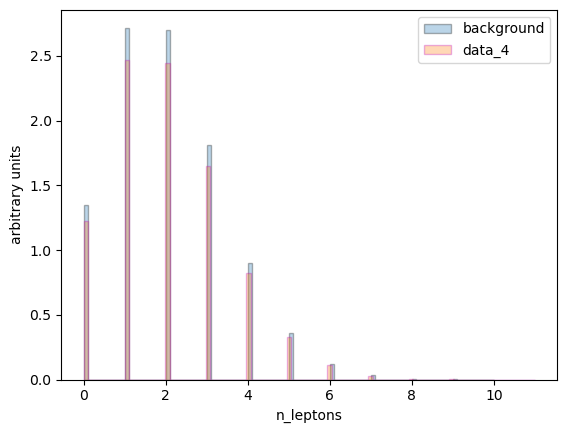

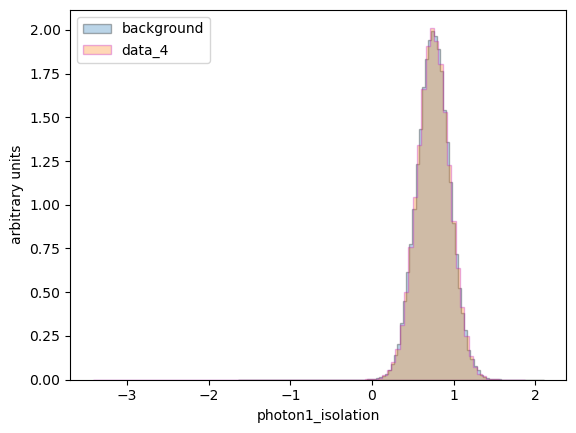

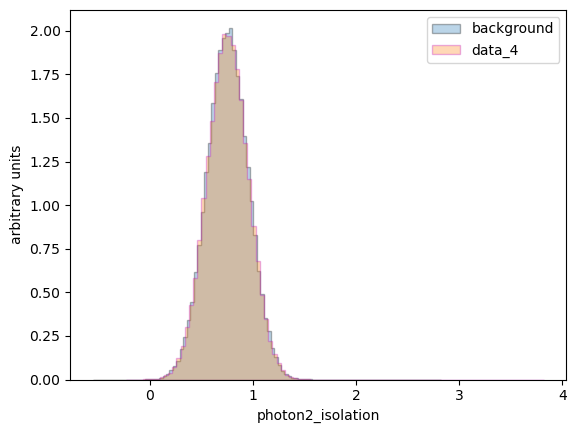

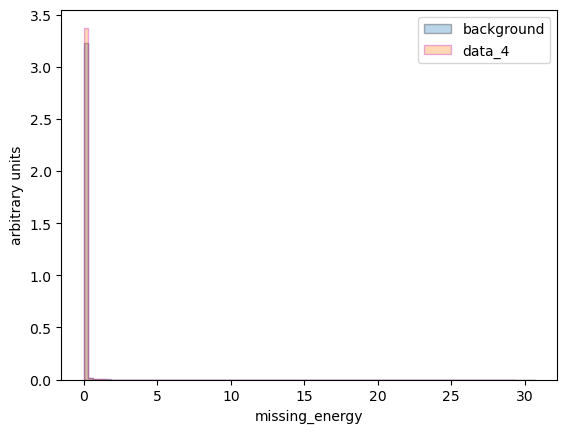

<Figure size 640x480 with 0 Axes>

In [177]:
samples = ["Rapport/data_4.csv", "Rapport/background.csv"]
sampleDict = {}

for sample in samples:
  sample_name = sample.split("/")[-1].split(".csv")[0]
  sampleDict[sample_name] = pd.read_csv(sample)

for obs in observables:
    for i, (s_name, s_data) in enumerate(sorted(sampleDict.items())):
        data = np.array(s_data[obs])
        plt.hist(data, 100, label = s_name, alpha=0.3, density=1, edgecolor = edgecolors[i] , histtype='stepfilled')
    plt.legend()
    plt.ylabel("arbitrary units")
    plt.xlabel(obs)
    plt.show()
    plt.clf()
    

# 2.Ajout myy

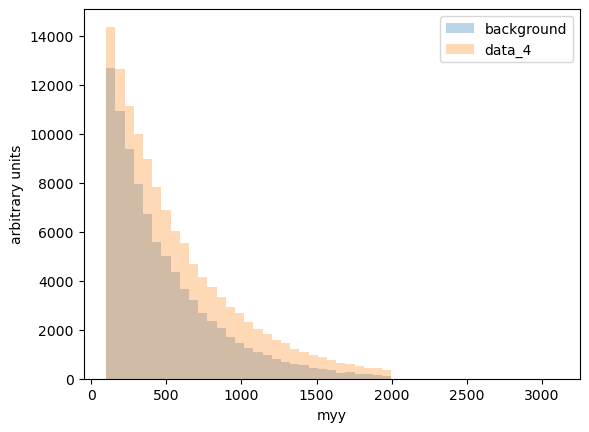

<Figure size 640x480 with 0 Axes>

In [178]:
for sample_name in sampleDict.keys():
  ds = sampleDict[sample_name]
  sampleDict[sample_name]["myy"] = ( 2 * ds["photon1_pT"]  * ds["photon2_pT"]  * (np.cosh(ds["photon1_eta"] - ds["photon2_eta"]) - np.cos(ds["photon1_phi"]- ds["photon2_phi"]))) ** 0.5



for obs in ["myy"]:
  for i, (s_name, s_data) in enumerate(sorted(sampleDict.items())):
    #print (i, s_name, s_data.keys())
    data = np.array(s_data[obs])    
    plt.hist(data, binning, label = s_name, alpha=0.3,  histtype='stepfilled') # , weights=lumi*cross_sections_times_filter_eff_by_total_N[s_name]*np.ones(len(data)))
  plt.legend()
  plt.ylabel("arbitrary units")
  plt.xlabel(obs)
  plt.show()
  plt.clf()


## 2.1 Ajout incertitudes

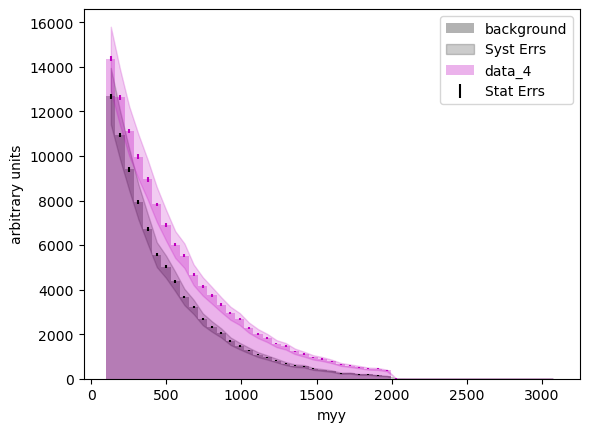

<Figure size 640x480 with 0 Axes>

In [179]:
cross_sections_times_filter_eff_by_total_N ={
"background": 1286.5*0.081/len(sampleDict["background"]),
"data_4":5.4*0.17/len(sampleDict["data_4"]),
}

for obs in ["myy"]:
  for i, (s_name, s_data) in enumerate(sorted(sampleDict.items())):
    #print (i, s_name, s_data.keys(),'\n','--------------','\n')
    data = np.array(s_data[obs])
    n, bins, _ = plt.hist(data, binning, label = s_name, alpha=0.3,  histtype='stepfilled', color=edgecolors[i])
    mid = 0.5*(bins[1:] + bins[:-1])
    lab_stat = None
    lab_syst = None
    if i==0 :
      lab_stat = "Stat Errs"
      lab_syst = "Syst Errs"
    plt.errorbar(mid, n, yerr=n**0.5, fmt='none', label=lab_stat, color=edgecolors[i])
    plt.fill_between(mid, n*0.9, n*1.1, color=edgecolors[i], alpha=0.2, label= lab_syst)

  plt.legend()
  plt.ylabel("arbitrary units")
  plt.xlabel(obs)
  plt.show()
  plt.clf()

# 3. Nb events avant cut

In [180]:
print("=========== TASK 1 ===========")
cutflow = {"cut" : ["none", "myy window"]}
masks = {"cut" : ["none", "myy window"]}

for sample_name in sorted(sampleDict.keys()):
    ds = sampleDict[sample_name]
    sampleDict[sample_name]["myy"] = ( 2 * ds["photon1_pT"]  * ds["photon2_pT"]  * (np.cosh(ds["photon1_eta"] - ds["photon2_eta"]) - np.cos(ds["photon1_phi"] - ds["photon2_phi"]))) ** 0.5  
    sampleDict[sample_name]["weights"] = 1

    mask = sampleDict[sample_name]["myy"] >400
    mask *= sampleDict[sample_name]["myy"] < 1100
    cutflow[sample_name] = [sum(sampleDict[sample_name]["weights"]), sum(sampleDict[sample_name]["weights"][mask])]
    masks[sample_name] = [np.ones(len(ds)), mask]
    print (sample_name, " has %.2f " % sum(sampleDict[sample_name]["weights"][mask]), " events in the SR")
    

=========== TASK 1 ===========
background  has 34335.00   events in the SR
data_4  has 51633.00   events in the SR


## 3.1 redraw obs

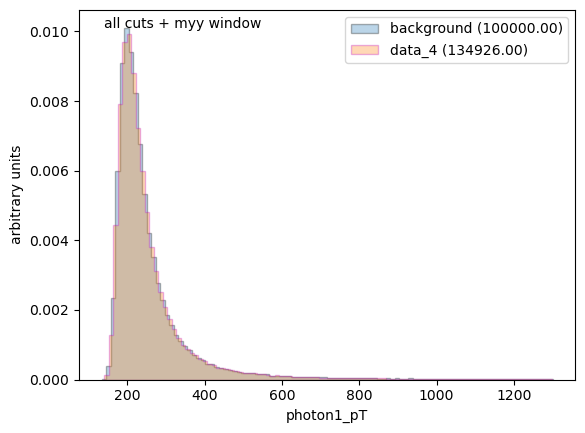

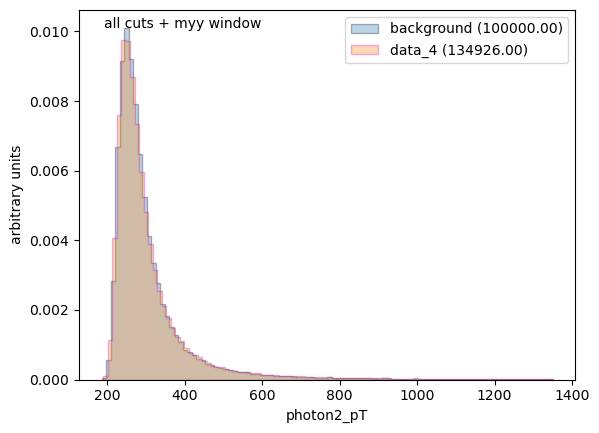

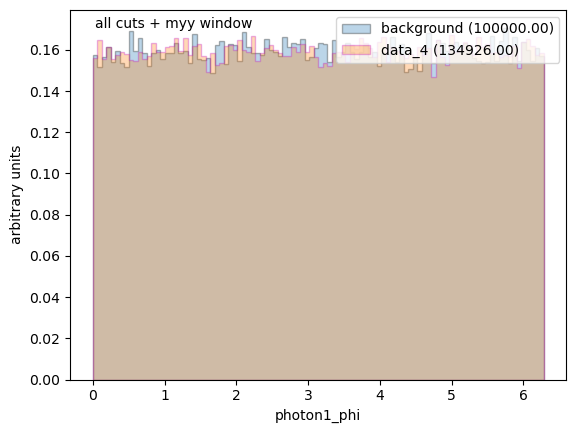

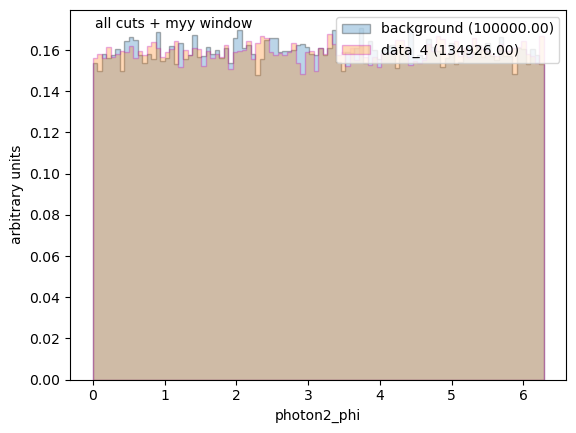

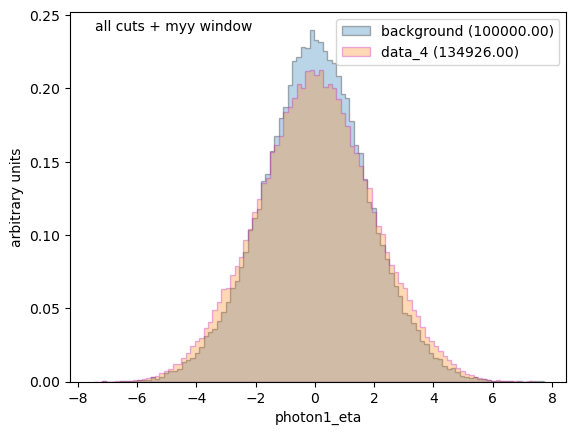

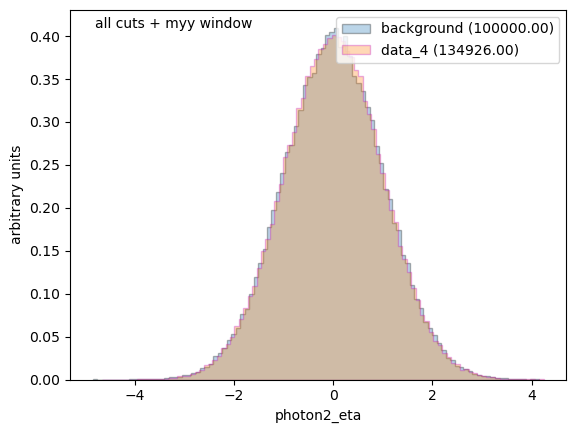

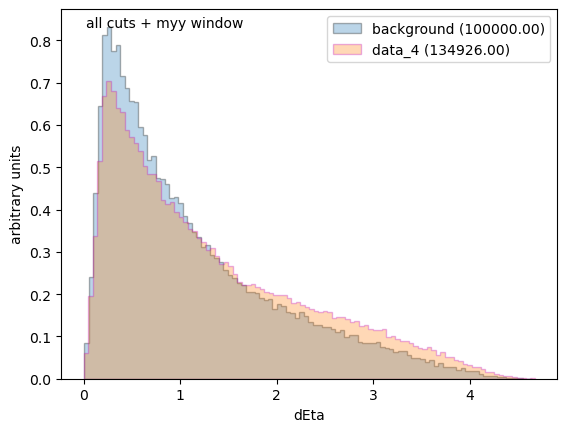

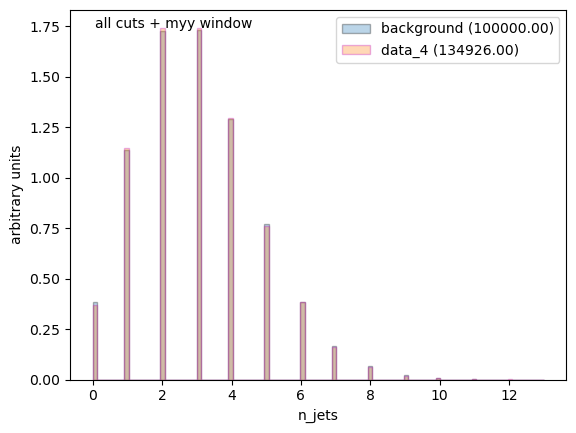

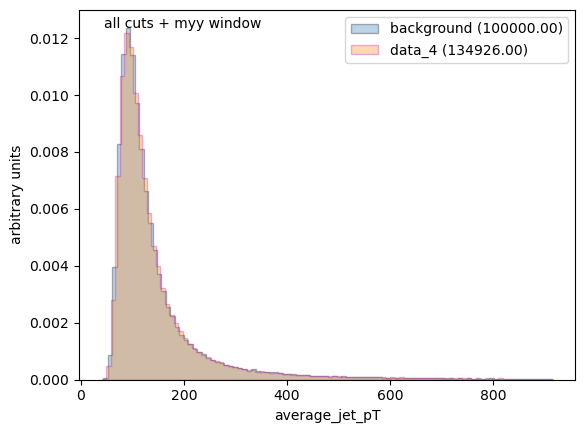

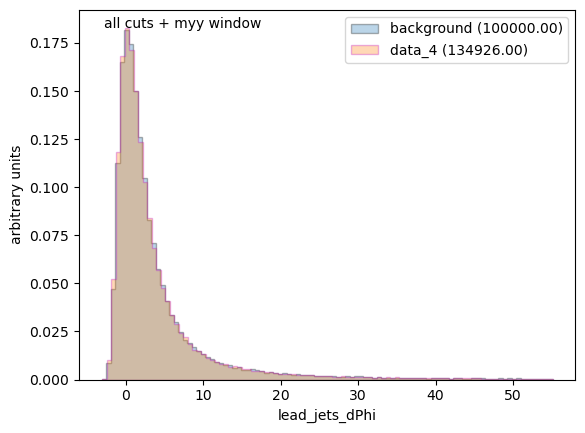

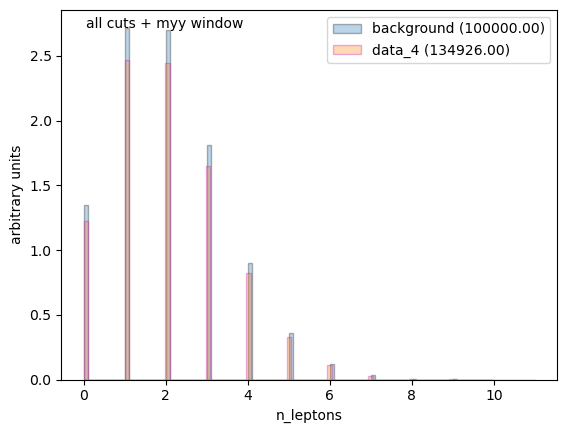

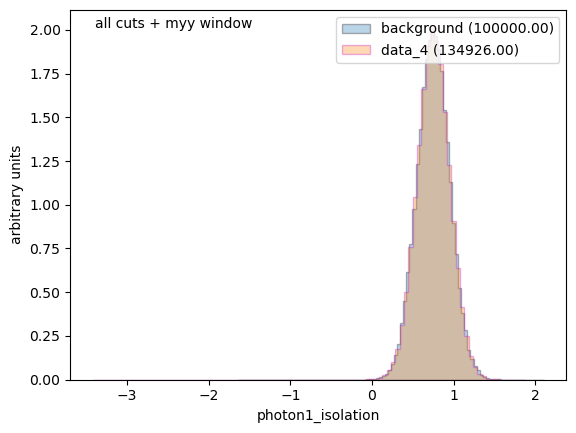

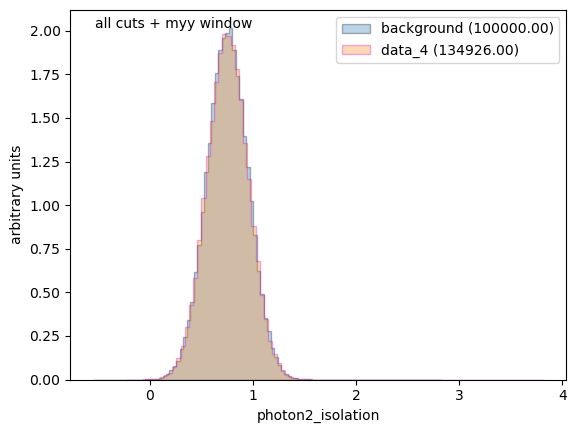

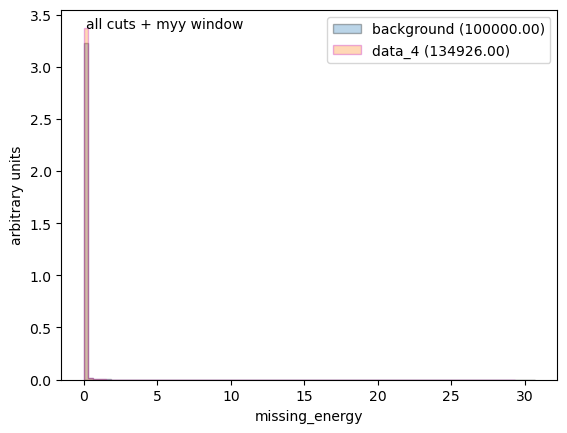

<Figure size 640x480 with 0 Axes>

In [181]:
def redrawAllObs(plotdir, the_cut):
  label = ""
  for obs in observables:
    for i, (s_name, s_data) in enumerate(sorted(sampleDict.items())):
      mask = np.ones(len(s_data[obs])).astype(bool)
      for cut in cutflow["cut"]:
        if cut == "myy window" : continue # skip myy window!
        mask *= masks[s_name][masks["cut"].index(cut)].astype(bool)
        if cut == the_cut : break # stop here !
      data = np.array(s_data[obs][mask])
      plt.hist(data, 100, label = "%s (%.2f)" % (s_name, s_data['weights'][mask].sum()) , alpha=0.3, density=1, edgecolor = edgecolors[i] , histtype='stepfilled')
    plt.legend()
    plt.annotate("all cuts + " + cut, xy=(0.05, 0.95), xycoords='axes fraction')
    plt.ylabel("arbitrary units")
    plt.xlabel(obs)
    plt.show()
    plt.clf()

redrawAllObs(plotdir+"/task1", masks["cut"][-1])


In [182]:
cf_df = pd.DataFrame(cutflow)
cf_df.head()

,cut,background,data_4
0,none,100000,134926
1,myy window,34335,51633


## 3.2 Cut

In [183]:
for sample_name in sorted(sampleDict.keys()):
    ds = sampleDict[sample_name]
    sampleDict[sample_name]["myy"] = ( 2 * ds["photon1_pT"]  * ds["photon2_pT"]  * (np.cosh(ds["photon1_eta"] - ds["photon2_eta"]) - np.cos((ds["photon1_phi"] - ds["photon2_phi"])))) ** 0.5
    sampleDict[sample_name]["weights"] = 1
    mask = np.ones(len(ds)).astype(bool)
    mask *= sampleDict[sample_name]['photon1_isolation'] > 0.49
    mask *= sampleDict[sample_name]['photon1_isolation'] < 0.87
    mask *= sampleDict[sample_name]['photon2_isolation'] > 0.47
    mask *= sampleDict[sample_name]['photon2_isolation'] < 0.88
    mask *= sampleDict[sample_name]['n_jets'] < 4
    mask *= sampleDict[sample_name]['average_jet_pT']  >43.4
    mask *= sampleDict[sample_name]['lead_jets_dPhi']  > -0.77
    mask *= sampleDict[sample_name]['lead_jets_dPhi']  < 6.29
    mask *= sampleDict[sample_name]['n_leptons']  < 1.41
    mask_sr = mask * sampleDict[sample_name]["myy"] >400
    mask_sr *= sampleDict[sample_name]["myy"] < 1100
    mask_cr = mask * np.logical_or( sampleDict[sample_name]["myy"] <400 , sampleDict[sample_name]["myy"] > 1100)
  # save the masks for the selection, sideband (=Control Region CR) and SR (search region) as columns!
    sampleDict[sample_name]["SR"] =  mask_sr
    sampleDict[sample_name]["sideband"] =  mask_cr
    sampleDict[sample_name]["selection"] =  mask
    
    

In [184]:
mask

0         False
1         False
2         False
3         False
4         False
          ...  
134921    False
134922    False
134923    False
134924    False
134925    False
Name: photon1_isolation, Length: 134926, dtype: bool

# 4.sideband

Our yield estimate is 2545.0851 +/- 88.2851
Parameters for Expo: 
Param 0 : 1391.469035 +/- 29.978092
Param 1 : 0.002580 +/- 0.000041


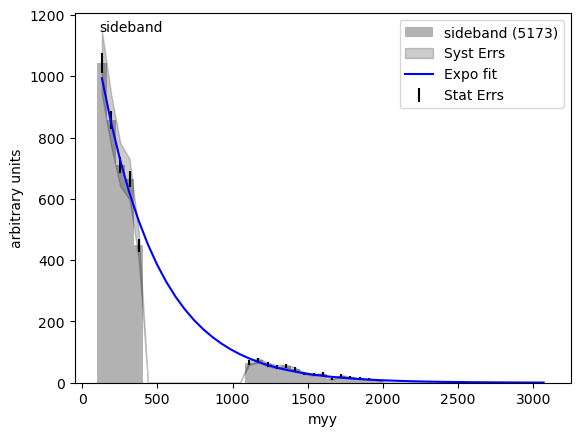

<Figure size 640x480 with 0 Axes>

In [185]:
bkgest, bkgest_err = 0, 0

def draw_myy(sample, region, label="", function=hp.Expo):
  global bkgest, bkgest_err
  if label=="": label=region
  i = 0
  obs="myy"
  s_data = sample

  mask = s_data[region]
  data = np.array(s_data[obs][mask ])

  n, bins, _ = plt.hist(data, binning, label = "%s (%d)" % (label, s_data['weights'][mask].sum()), alpha=0.3,  histtype='stepfilled', color=edgecolors[i], weights=s_data['weights'][mask])
  mid = 0.5*(bins[1:] + bins[:-1])
  lab_stat = None
  lab_syst = None
  if i==0 :
    lab_stat = "Stat Errs"
    lab_syst = "Syst Errs"
  plt.errorbar(mid, n, yerr=n**0.5, fmt='none', label=lab_stat, color=edgecolors[i])
  plt.fill_between(mid, n*0.9, n*1.1, color=edgecolors[i], alpha=0.2, label= lab_syst)
  plt.annotate(label, xy=(0.05, 0.95), xycoords='axes fraction')

  plt.ylabel("arbitrary units")
  plt.xlabel(obs)
  x, params, errs = hp.do_fit(function, bins, n)
  bkgest, bkest_stat_err =  hp.integral_with_errors(function, x, (400,1100), params, errs)
  bkgest_syst_err = 0.01*bkgest
  bkgest_err = ((0.01*bkgest)**2 + bkest_stat_err**2)**0.5
  plt.plot(x, function(x, *params), '-', color="blue", label = "%s fit" % function.__name__)
  if  "Gaus" in function.__name__:
    print("========Fitted signal========")
    y, ye = hp.integral_with_errors(hp.Gaussian, x, (400,1100), params[:3], errs[:3])
    xsFactor = 5.4/613. # this depends on your own cuts 
    print("measured yield: %.2f +/- %.2f " % ( y, ye))
    print("measured cross-section: %.2f +/- %.2f pb" % (  y*xsFactor, ye*xsFactor))
    print("measured mass: %.2f +/- %.2f GeV" % ( params[0], errs[0]))
    print("measured width: %.2f +/- %.2f GeV" % ( params[1], errs[1]))
    print("measured const: %.2f +/- %.2f" % ( params[2], errs[2]))
  if function.__name__ == "Expo":
    print ("Our yield estimate is %.4f +/- %.4f" % (bkgest, bkgest_err))
  print ("Parameters for %s: " % (function.__name__))
  for ip, (p,e) in  enumerate(zip(params, errs)):
    print("Param %d : %f +/- %f" % (ip, p, e))
  plt.legend()
  plt.show()
  plt.clf()
  return n, bins, params, errs


n, bins, params, errs = draw_myy(sampleDict["background"],  "sideband")

Pour les weights, creer un tableau de dim(data_4) rempli de 1

In [186]:
s_data['weights']

0         1
1         1
2         1
3         1
4         1
         ..
134921    1
134922    1
134923    1
134924    1
134925    1
Name: weights, Length: 134926, dtype: int64

## 4.1 Fit

In [187]:
hp.fixedExpoN=1391.4690
hp.fixedExpoL=0.002580


========Fitted signal========
measured yield: 3213.10 +/- 80.25 
measured cross-section: 28.30 +/- 0.71 pb
measured mass: 684.69 +/- 4.42 GeV
measured width: 216.07 +/- 4.29 GeV
measured const: 418.02 +/- 9.24
Parameters for Gaussian: 
Param 0 : 684.688497 +/- 4.422880
Param 1 : 216.072713 +/- 4.289899
Param 2 : 418.020687 +/- 9.239175


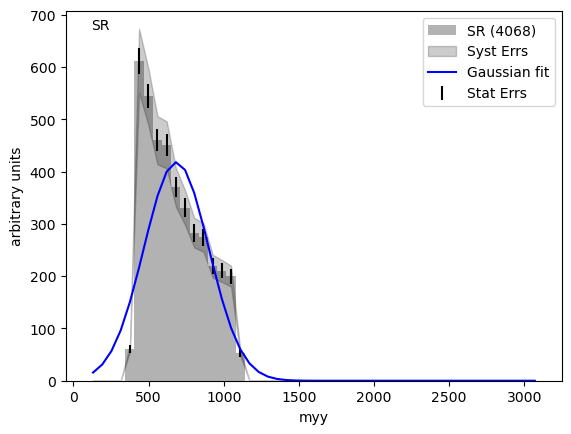

<Figure size 640x480 with 0 Axes>

In [188]:
n, bins, params, errs  = draw_myy(sampleDict["data_4"] , "SR", function=hp.Gaussian)

========Fitted signal========
measured yield: 1538.31 +/- 221.32 
measured cross-section: 13.55 +/- 1.95 pb
measured mass: 44.33 +/- 200.05 GeV
measured width: 891.93 +/- 91.21 GeV
measured const: 178.85 +/- 19.26
Parameters for GausPlusFixedExpo: 
Param 0 : 44.333414 +/- 200.052956
Param 1 : 891.927102 +/- 91.209874
Param 2 : 178.854282 +/- 19.264597


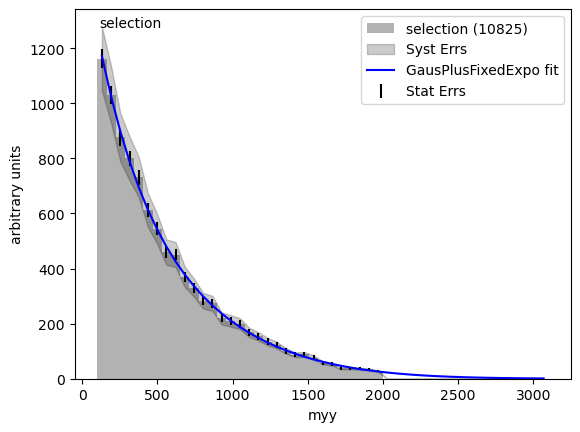

<Figure size 640x480 with 0 Axes>

In [189]:
# Fit the dataset composed of background+signal to Gaussian on top of Fixed exponential, and make sure we get the right boson mass
n, bins, params, errs  = draw_myy(sampleDict["data_4"] , "selection", function=hp.GausPlusFixedExpo)


## 4.2 En ajoutant significance

In [190]:
# a) when you comapre to just the bkg sample
sample = sampleDict["background"]
n_obs = sample['weights'][sample["SR"]].sum()
significance =  abs(n_obs - bkgest) / bkgest_err
print ("SM only: obs = %.2f"% n_obs, " exp = %.2f +/- %.2f "% (bkgest, bkgest_err),   " s=%.1f sigma"% significance)



SM only: obs = 2695.00  exp = 4091.04 +/- 219.74   s=6.4 sigma


Nominal signal (μ = 1)      Observed CLs: 0.000000
Nominal signal (μ = 1) Expected CLs(-2 σ): 0.000000
Nominal signal (μ = 1) Expected CLs(-1 σ): 0.000000
Nominal signal (μ = 1) Expected CLs( 0 σ): 0.000000
Nominal signal (μ = 1) Expected CLs( 1 σ): 0.000000
Nominal signal (μ = 1) Expected CLs( 2 σ): 0.000000
Upper limit (obs): μ = 0.1000
Upper limit (exp): μ = 0.1000


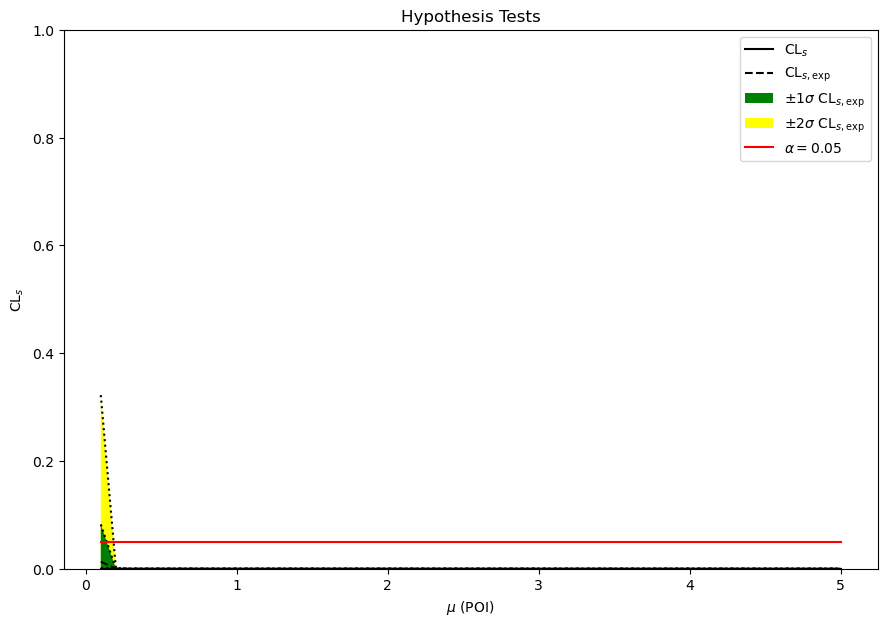

In [191]:
hp.cls_limit_calculator([3214.50], [7251.67], [164.81], [2695.00])